In [1]:
import requests
import json
import pprint
import csv
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Initialize an empty list to store all cocktail data
all_cocktails = []

# Loop through each letter from 'a' to 'z'
for letter in range(ord('a'), ord('z')+1):
    letter = chr(letter)
    
    # Make a request to the API endpoint for cocktails starting with the current letter
    url = f"https://www.thecocktaildb.com/api/json/v1/1/search.php?f={letter}&api_key=1"
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Check if the response JSON object is not None
        if response.json() is not None:
            drinks_data = response.json().get('drinks')
            if drinks_data is not None:
                # Append the cocktail data to the list
                all_cocktails.extend(drinks_data)
            else:
                print(f"No cocktail data found for letter {letter}")
        else:
            print(f"No JSON data returned for letter {letter}")
    else:
        print(f"Failed to retrieve data for letter {letter}")

# Save all cocktail data to a single JSON file
with open('all_cocktails.json', 'w') as file:
    json.dump(all_cocktails, file)

print("All cocktail data saved to all_cocktails.json")

No cocktail data found for letter u
No cocktail data found for letter x
All cocktail data saved to all_cocktails.json


In [3]:
pprint.pprint(all_cocktails)

[{'dateModified': '2017-09-07 21:42:09',
  'idDrink': '17222',
  'strAlcoholic': 'Alcoholic',
  'strCategory': 'Cocktail',
  'strCreativeCommonsConfirmed': 'No',
  'strDrink': 'A1',
  'strDrinkAlternate': None,
  'strDrinkThumb': 'https://www.thecocktaildb.com/images/media/drink/2x8thr1504816928.jpg',
  'strGlass': 'Cocktail glass',
  'strIBA': None,
  'strImageAttribution': None,
  'strImageSource': None,
  'strIngredient1': 'Gin',
  'strIngredient10': None,
  'strIngredient11': None,
  'strIngredient12': None,
  'strIngredient13': None,
  'strIngredient14': None,
  'strIngredient15': None,
  'strIngredient2': 'Grand Marnier',
  'strIngredient3': 'Lemon Juice',
  'strIngredient4': 'Grenadine',
  'strIngredient5': None,
  'strIngredient6': None,
  'strIngredient7': None,
  'strIngredient8': None,
  'strIngredient9': None,
  'strInstructions': 'Pour all ingredients into a cocktail shaker, mix and '
                     'serve over ice into a chilled glass.',
  'strInstructionsDE': 'Alle

In [4]:
# Count the number of elements in the list
num_elements = len(all_cocktails)

# Print the number of elements
print("Number of elements in the list:", num_elements)

Number of elements in the list: 426


In [5]:
# Load JSON data from a file
with open('all_cocktails.json', 'r') as json_file:
    all_cocktails = json.load(json_file)

# Specify the CSV file path
csv_file_path = 'Outputs\cocktails_output.csv'

# Extract column headers from the keys of the first cocktail in the list
fieldnames = all_cocktails[0].keys()

# Write the JSON data to a CSV file
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for row in all_cocktails:
        writer.writerow(row)

print("JSON data saved to CSV successfully.")

JSON data saved to CSV successfully.


In [6]:
# Load the JSON file into a Pandas DataFrame
df = pd.read_csv('Outputs\cocktails_output.csv')

# Display the DataFrame
df

,idDrink,strDrink,strDrinkAlternate,strTags,strVideo,strCategory,strIBA,strAlcoholic,strGlass,strInstructions,...,strMeasure10,strMeasure11,strMeasure12,strMeasure13,strMeasure14,strMeasure15,strImageSource,strImageAttribution,strCreativeCommonsConfirmed,dateModified
0,17222,A1,NaN,NaN,NaN,Cocktail,NaN,Alcoholic,Cocktail glass,"Pour all ingredients into a cocktail shaker, m...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2017-09-07 21:42:09
1,13501,ABC,NaN,NaN,NaN,Shot,NaN,Alcoholic,Shot glass,Layered in a shot glass.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2016-08-31 19:32:08
2,17225,Ace,NaN,NaN,NaN,Cocktail,NaN,Alcoholic,Martini Glass,Shake all the ingredients in a cocktail shaker...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2017-09-07 22:05:06
3,14610,ACID,NaN,NaN,NaN,Shot,NaN,Alcoholic,Shot glass,Poor in the 151 first followed by the 101 serv...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2016-11-15 11:28:37
4,17837,Adam,NaN,"Alcoholic,Holiday",NaN,Ordinary Drink,NaN,Alcoholic,Cocktail glass,"In a shaker half-filled with ice cubes, combin...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,2016-09-02 11:29:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,17027,Zima Blaster,NaN,NaN,NaN,Ordinary Drink,NaN,Alcoholic,Hurricane glass,"Fill glass with ice. Pour in Chambord, then fi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2017-01-28 16:09:57
422,14594,Zizi Coin-coin,NaN,NaN,NaN,Punch / Party Drink,NaN,Alcoholic,Margarita/Coupette glass,"Pour 5cl of Cointreau on ice, add 2cl of fresh...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2017-01-28 16:25:52
423,15801,Zimadori Zinger,NaN,NaN,NaN,Punch / Party Drink,NaN,Alcoholic,Collins glass,Pour Zima in a collins glass over ice and then...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2017-01-28 16:12:00
424,14065,Zippy's Revenge,NaN,NaN,NaN,Cocktail,NaN,Alcoholic,Old-fashioned glass,Mix Kool-Aid to taste then add Rum and ammaret...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2017-01-28 16:18:33


In [7]:
# testing of columns - max column length 
max_length_inst = df['strInstructions'].str.len().max()

print(f"The length of the longest value in the column is: {max_length_inst}")

The length of the longest value in the column is: 2524


In [8]:
# ingredient value counts

# Specify the columns for which you want to calculate unique counts
selected_columns = ['strIngredient1', 'strIngredient2', 'strIngredient3','strIngredient4', 'strIngredient5', 'strIngredient6', 'strIngredient7', 'strIngredient8', 'strIngredient9',
                    'strIngredient10', 'strIngredient11']

# Get unique value counts for values in the selected columns
unique_counts = pd.concat([df[col].value_counts() for col in selected_columns], axis=1).sum(axis=1)
                         

# Display the unique counts for values in the selected columns
print(unique_counts)

unique_counts = unique_counts.reset_index()
unique_counts.columns = ['Ingredient', 'Count']
unique_counts.head()

# Specify the output file path
output_file = 'Outputs\ingredient_unique_count.csv'

# Write the data to a CSV file
with open(output_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Ingredient', 'Count'])  # Write header row
    for ingredient, count in unique_counts.items():
        writer.writerow([ingredient, count])

print("Data has been written to output.csv")


Gin                 81.0
Vodka               64.0
Light rum           28.0
Rum                 19.0
Scotch              13.0
                    ... 
Caramel coloring     1.0
Sweet and Sour       1.0
Lavender             1.0
Black pepper         1.0
Fresca               1.0
Length: 327, dtype: float64
Data has been written to output.csv


In [9]:
# Value counts of category 

# Get unique value counts for values in the selected columns
value_counts = df['strCategory'].value_counts()
print(value_counts)

# Display the unique counts for values in the selected columns
print(value_counts)

# Specify the output file path
output_file = 'Outputs\Category_unique_count.csv'

# Write the data to a CSV file
with open(output_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Category', 'Count'])  # Write header row
    for category, count in value_counts.items():
        writer.writerow([category, count])

print("Data has been written to Category_unique_count.csv")

strCategory
Ordinary Drink         192
Cocktail               101
Shot                    33
Punch / Party Drink     24
Other / Unknown         23
Coffee / Tea            23
Beer                     7
Shake                    7
Soft Drink               6
Homemade Liqueur         5
Cocoa                    5
Name: count, dtype: int64
strCategory
Ordinary Drink         192
Cocktail               101
Shot                    33
Punch / Party Drink     24
Other / Unknown         23
Coffee / Tea            23
Beer                     7
Shake                    7
Soft Drink               6
Homemade Liqueur         5
Cocoa                    5
Name: count, dtype: int64
Data has been written to Category_unique_count.csv


In [10]:
# First stage of dataframe cleanup - column drop 

# add columns we want to drop to a list
columns_to_drop =  ['strDrinkAlternate',
             'strVideo',
             'strIBA',
             'strInstructionsES',
             'strInstructionsDE',
             'strInstructionsFR',
             'strInstructionsIT',
             'strInstructionsZH-HANS',
             'strInstructionsZH-HANT',
             'strIngredient12',
             'strIngredient13',
             'strIngredient14',
             'strIngredient15',
             'strMeasure12',
             'strMeasure13',
             'strMeasure14',
             'strMeasure15',
             'strImageSource',
             'strImageAttribution']

df.drop(columns=columns_to_drop, inplace=True)


In [11]:
df

,idDrink,strDrink,strTags,strCategory,strAlcoholic,strGlass,strInstructions,strDrinkThumb,strIngredient1,strIngredient2,...,strMeasure4,strMeasure5,strMeasure6,strMeasure7,strMeasure8,strMeasure9,strMeasure10,strMeasure11,strCreativeCommonsConfirmed,dateModified
0,17222,A1,NaN,Cocktail,Alcoholic,Cocktail glass,"Pour all ingredients into a cocktail shaker, m...",https://www.thecocktaildb.com/images/media/dri...,Gin,Grand Marnier,...,1/8 Shot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2017-09-07 21:42:09
1,13501,ABC,NaN,Shot,Alcoholic,Shot glass,Layered in a shot glass.,https://www.thecocktaildb.com/images/media/dri...,Amaretto,Baileys irish cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2016-08-31 19:32:08
2,17225,Ace,NaN,Cocktail,Alcoholic,Martini Glass,Shake all the ingredients in a cocktail shaker...,https://www.thecocktaildb.com/images/media/dri...,Gin,Grenadine,...,1/2 shot,1/2 Fresh,NaN,NaN,NaN,NaN,NaN,NaN,No,2017-09-07 22:05:06
3,14610,ACID,NaN,Shot,Alcoholic,Shot glass,Poor in the 151 first followed by the 101 serv...,https://www.thecocktaildb.com/images/media/dri...,151 proof rum,Wild Turkey,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2016-11-15 11:28:37
4,17837,Adam,"Alcoholic,Holiday",Ordinary Drink,Alcoholic,Cocktail glass,"In a shaker half-filled with ice cubes, combin...",https://www.thecocktaildb.com/images/media/dri...,Dark rum,Lemon juice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,2016-09-02 11:29:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,17027,Zima Blaster,NaN,Ordinary Drink,Alcoholic,Hurricane glass,"Fill glass with ice. Pour in Chambord, then fi...",https://www.thecocktaildb.com/images/media/dri...,Zima,Chambord raspberry liqueur,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2017-01-28 16:09:57
422,14594,Zizi Coin-coin,NaN,Punch / Party Drink,Alcoholic,Margarita/Coupette glass,"Pour 5cl of Cointreau on ice, add 2cl of fresh...",https://www.thecocktaildb.com/images/media/dri...,Cointreau,Lemon juice,...,or lime\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2017-01-28 16:25:52
423,15801,Zimadori Zinger,NaN,Punch / Party Drink,Alcoholic,Collins glass,Pour Zima in a collins glass over ice and then...,https://www.thecocktaildb.com/images/media/dri...,Midori melon liqueur,Zima,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2017-01-28 16:12:00
424,14065,Zippy's Revenge,NaN,Cocktail,Alcoholic,Old-fashioned glass,Mix Kool-Aid to taste then add Rum and ammaret...,https://www.thecocktaildb.com/images/media/dri...,Amaretto,Rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2017-01-28 16:18:33


In [12]:
df.columns

Index(['idDrink', 'strDrink', 'strTags', 'strCategory', 'strAlcoholic',
       'strGlass', 'strInstructions', 'strDrinkThumb', 'strIngredient1',
       'strIngredient2', 'strIngredient3', 'strIngredient4', 'strIngredient5',
       'strIngredient6', 'strIngredient7', 'strIngredient8', 'strIngredient9',
       'strIngredient10', 'strIngredient11', 'strMeasure1', 'strMeasure2',
       'strMeasure3', 'strMeasure4', 'strMeasure5', 'strMeasure6',
       'strMeasure7', 'strMeasure8', 'strMeasure9', 'strMeasure10',
       'strMeasure11', 'strCreativeCommonsConfirmed', 'dateModified'],
      dtype='object')

In [13]:
measures_list = ['strMeasure1',
                 'strMeasure2',
                 'strMeasure3',
                 'strMeasure4',
                 'strMeasure5',
                 'strMeasure6',
                 'strMeasure7',
                 'strMeasure8',
                 'strMeasure9',
                 'strMeasure10',
                 'strMeasure11']


ingredients_list = ['strIngredient1',
                    'strIngredient2',
                    'strIngredient3',
                    'strIngredient4',
                    'strIngredient5',
                    'strIngredient6',
                    'strIngredient7',
                    'strIngredient8',
                    'strIngredient9',
                    'strIngredient10',
                    'strIngredient11']

cocktail_df_exclude_cols = measures_list + ingredients_list

#Cocktails DB
cocktails_df = df.drop(columns=cocktail_df_exclude_cols)
cocktails_df.head()


,idDrink,strDrink,strTags,strCategory,strAlcoholic,strGlass,strInstructions,strDrinkThumb,strCreativeCommonsConfirmed,dateModified
0,17222,A1,NaN,Cocktail,Alcoholic,Cocktail glass,"Pour all ingredients into a cocktail shaker, m...",https://www.thecocktaildb.com/images/media/dri...,No,2017-09-07 21:42:09
1,13501,ABC,NaN,Shot,Alcoholic,Shot glass,Layered in a shot glass.,https://www.thecocktaildb.com/images/media/dri...,No,2016-08-31 19:32:08
2,17225,Ace,NaN,Cocktail,Alcoholic,Martini Glass,Shake all the ingredients in a cocktail shaker...,https://www.thecocktaildb.com/images/media/dri...,No,2017-09-07 22:05:06
3,14610,ACID,NaN,Shot,Alcoholic,Shot glass,Poor in the 151 first followed by the 101 serv...,https://www.thecocktaildb.com/images/media/dri...,No,2016-11-15 11:28:37
4,17837,Adam,"Alcoholic,Holiday",Ordinary Drink,Alcoholic,Cocktail glass,"In a shaker half-filled with ice cubes, combin...",https://www.thecocktaildb.com/images/media/dri...,Yes,2016-09-02 11:29:29


In [14]:
#Cocktails DB
cocktails_df = df.drop(columns=cocktail_df_exclude_cols)
cocktails_df.head()

# column renames

# Dictionary mapping old column names to new column names
new_column_names = {'idDrink': 'Drink_ID',
                    'strDrink': 'Drink_Name',
                    'strThumbs': 'Drink_Thumbs',
                    'strTags': 'Drink_Tags',
                    'strCategory': 'Category',
                    'strAlcoholic': 'Alcoholic',
                    'strGlass': 'Glass_Type',
                    'strInstructions': 'Instructions',
                    'strCreativeCommonsConfirmed': 'CreativeCommons',                    
                    'dateModified': 'Date_Modified'}

# Rename multiple columns at once
cocktails_df.rename(columns=new_column_names, inplace=True)

# Specify the output file path
output_path = 'Outputs\Cocktails_table_output.csv'

# write out CSV file
cocktails_df.to_csv(output_path, index=False)

In [15]:
#ingredients table
ingredients_list = ['idDrink'] + ingredients_list
ingredients_df = df[ingredients_list]
ingredients_df.head()

# Dictionary mapping old column names to new column names
new_column_names = {'idDrink': 'Drink_ID',
                    'strIngredient1': 'Ingredient1',           
                    'strIngredient2': 'Ingredient2',      
                    'strIngredient3': 'Ingredient3',      
                    'strIngredient4': 'Ingredient4',      
                    'strIngredient5': 'Ingredient5',      
                    'strIngredient6': 'Ingredient6',      
                    'strIngredient7': 'Ingredient7',      
                    'strIngredient8': 'Ingredient8',            
                    'strIngredient9': 'Ingredient9',   
                    'strIngredient10': 'Ingredient10',   
                    'strIngredient11': 'Ingredient11'}

# Rename multiple columns at once
ingredients_df.rename(columns=new_column_names, inplace=True)

# Specify the output file path
output_path = 'Outputs\Ingredients_table_output.csv'

# write out CSV file
ingredients_df.to_csv(output_path, index=False)

C:\Users\atlas\AppData\Local\Temp\ipykernel_78160\2245053548.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingredients_df.rename(columns=new_column_names, inplace=True)


In [16]:
#Measures table
measures_list = ['idDrink'] + measures_list
measures_df = df[measures_list]
measures_df.head()

# Dictionary mapping old column names to new column names
new_column_names = {'idDrink': 'Drink_ID',
                    'strMeasure1': 'Measure1',           
                    'strMeasure2': 'Measure2',      
                    'strMeasure3': 'Measure3',      
                    'strMeasure4': 'Measure4',      
                    'strMeasure5': 'Measure5',      
                    'strMeasure6': 'Measure6',      
                    'strMeasure7': 'Measure7',      
                    'strMeasure8': 'Measure8',            
                    'strMeasure9': 'Measure9',   
                    'strMeasure10': 'Measure10',   
                    'strMeasure11': 'Measure11'}

# Rename multiple columns at once
measures_df.rename(columns=new_column_names, inplace=True)

# Specify the output file path
output_path = 'Outputs\Measures_table_output.csv'

# write out CSV file
measures_df.to_csv(output_path, index=False)

C:\Users\atlas\AppData\Local\Temp\ipykernel_78160\2610437871.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measures_df.rename(columns=new_column_names, inplace=True)


In [17]:
unique_counts

,Ingredient,Count
0,Gin,81.0
1,Vodka,64.0
2,Light rum,28.0
3,Rum,19.0
4,Scotch,13.0
...,...,...
322,Caramel coloring,1.0
323,Sweet and Sour,1.0
324,Lavender,1.0
325,Black pepper,1.0


In [18]:
unique_counts = unique_counts.sort_values(by='Count', ascending=False)
unique_counts.reset_index(drop=True, inplace=True)
unique_counts.index +=1
top_20_ingredients = unique_counts.head(20)

C:\Users\atlas\AppData\Local\Temp\ipykernel_78160\1470308760.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_ingredients, x='Ingredient', y='Count',  palette=custom_palette)
C:\Users\atlas\AppData\Local\Temp\ipykernel_78160\1470308760.py:4: UserWarning: 
The palette list has fewer values (3) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_20_ingredients, x='Ingredient', y='Count',  palette=custom_palette)


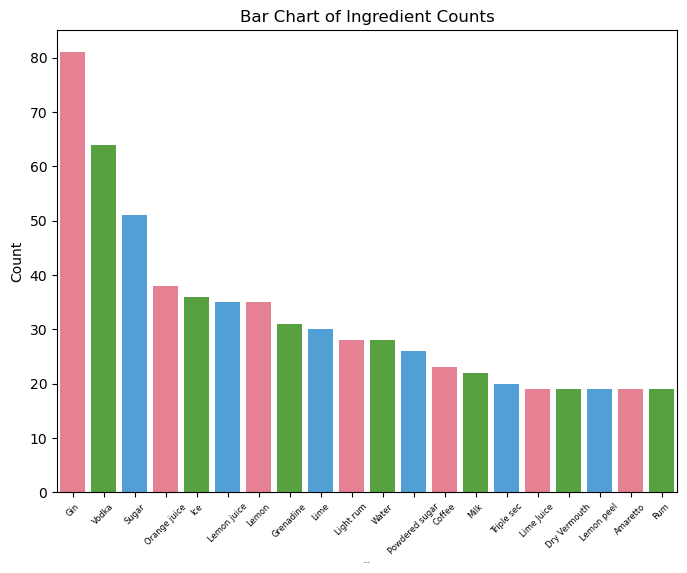

In [19]:
#unique_counts visuals (ingredients)
custom_palette = sns.color_palette("husl", 3)
plt.figure(figsize=(8, 6))
sns.barplot(data=top_20_ingredients, x='Ingredient', y='Count',  palette=custom_palette)
plt.title('Bar Chart of Ingredient Counts')
plt.xlabel('Ingredient', fontsize=1)
plt.xticks(rotation=45, fontsize=6)
  # Rotate x-axis labels for better readability
plt.show()

In [20]:
top_20_ingredients

,Ingredient,Count
1,Gin,81.0
2,Vodka,64.0
3,Sugar,51.0
4,Orange juice,38.0
5,Ice,36.0
6,Lemon juice,35.0
7,Lemon,35.0
8,Grenadine,31.0
9,Lime,30.0
10,Light rum,28.0


In [21]:
value_counts = value_counts.reset_index()
value_counts.columns = ['Category', 'Count']

In [22]:
value_counts = value_counts.sort_values(by='Count', ascending=False)
value_counts.reset_index(drop=True, inplace=True)
value_counts.index +=1
top_20_categories = value_counts.head(20)

C:\Users\atlas\AppData\Local\Temp\ipykernel_78160\1363751763.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_categories, x='Category', y='Count',  palette=custom_palette)
C:\Users\atlas\AppData\Local\Temp\ipykernel_78160\1363751763.py:4: UserWarning: 
The palette list has fewer values (3) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_20_categories, x='Category', y='Count',  palette=custom_palette)


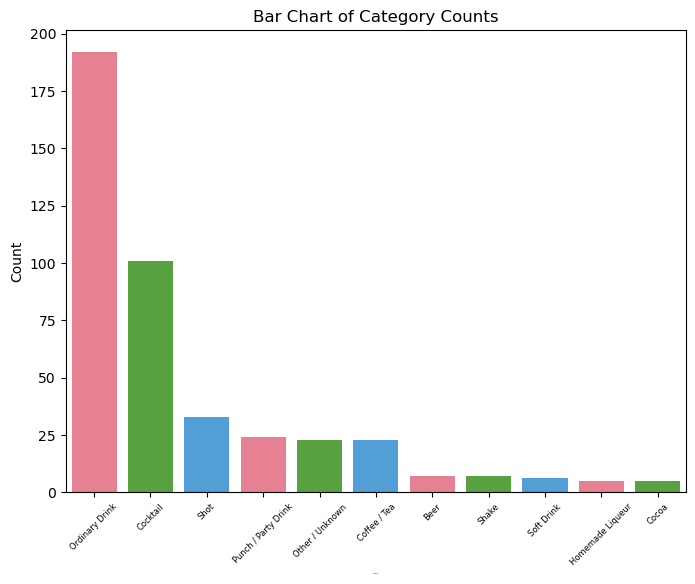

In [23]:
#value_counts visuals (categories)
custom_palette = sns.color_palette("husl", 3)
plt.figure(figsize=(8, 6))
sns.barplot(data=top_20_categories, x='Category', y='Count',  palette=custom_palette)
plt.title('Bar Chart of Category Counts')
plt.xlabel('Category', fontsize=1)
plt.xticks(rotation=45, fontsize=6)
  # Rotate x-axis labels for better readability
plt.show()

In [24]:
top_20_categories

,Category,Count
1,Ordinary Drink,192
2,Cocktail,101
3,Shot,33
4,Punch / Party Drink,24
5,Other / Unknown,23
6,Coffee / Tea,23
7,Beer,7
8,Shake,7
9,Soft Drink,6
10,Homemade Liqueur,5
